In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

---

# 1. hackle_events

In [2]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"
# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/hackle/hackle_events.parquet'

# 데이터 불러오기
hackle_events_df = pd.read_parquet(gcs_path, engine='pyarrow')
hackle_events_df

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
1,00000716-27e9-4e72-a602-d0ce61784b06,2023-07-18 21:07:24,click_question_open,8QXy31PQxbW9qLzq0Y1dhR8Ypm52,00000716-27e9-4e72-a602-d0ce61784b06,,,64.0,436.0,4830.0,NaN
2,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,2023-08-06 20:18:03,click_bottom_navigation_profile,6bcea65d-9f40-46fc-888c-700fe707483f,000007c8-68ce-40e6-9b1e-f0e34e8ff9cc,,,26.0,174.0,4729.0,NaN
3,00000981-5e2a-4111-993e-4f1891ad9a53,2023-08-05 01:46:10,view_shop,XVYNT6zfhFWqIg9omwg2AHDjTLx2,00000981-5e2a-4111-993e-4f1891ad9a53,,,61.0,44.0,142.0,NaN
4,00000a7a-ba72-4332-b4a9-7910670aaeb2,2023-07-24 15:03:37,click_bottom_navigation_lab,XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3,00000a7a-ba72-4332-b4a9-7910670aaeb2,,,119.0,545.0,3287.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11441314,fffff54e-e730-418f-8080-4eff7e2641f2,2023-08-08 01:40:00,view_timeline_tap,n9RSY5wNfvURIV3sKeXZiYWiVSD3,fffff54e-e730-418f-8080-4eff7e2641f2,,,27.0,92.0,326.0,NaN
11441315,fffff57d-6c79-46b3-a87b-4bfa900ef11b,2023-07-23 09:30:22,skip_question,CB3F11FD-4B78-4496-96E7-3B4174C123E9,fffff57d-6c79-46b3-a87b-4bfa900ef11b,,,0.0,0.0,300.0,799.0
11441316,fffff632-2d70-4190-addd-6ae2f2399876,2023-07-18 18:13:30,view_lab_tap,AwpRr0ll7bTfFV22MIXHDASEpz72,fffff632-2d70-4190-addd-6ae2f2399876,,,29.0,97.0,284.0,NaN
11441317,fffffb07-af2f-4cce-a26e-1dcc97c74b14,2023-07-21 15:37:27,view_timeline_tap,H8oiWwKxRiYByNykbb2GsVYd8JU2,fffffb07-af2f-4cce-a26e-1dcc97c74b14,,,49.0,527.0,932.0,NaN


In [3]:
hackle_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 11 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ms]
 2   event_key       object        
 3   session_id      object        
 4   id              object        
 5   item_name       object        
 6   page_name       object        
 7   friend_count    float64       
 8   votes_count     float64       
 9   heart_balance   float64       
 10  question_id     float64       
dtypes: datetime64[ms](1), float64(4), object(6)
memory usage: 960.2+ MB


In [5]:
hackle_events_df.isnull().sum()

event_id                 0
event_datetime           0
event_key                0
session_id               0
id                       0
item_name                0
page_name                0
friend_count        752556
votes_count         754554
heart_balance       728643
question_id       10991835
dtype: int64

In [6]:
hackle_events_df.describe(include='all')

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id
count,11441319,11441319,11441319,11441319,11441319,11441319,11441319,1.068876e+07,1.068676e+07,1.071268e+07,449484.000000
unique,11441319,NaN,44,253616,11441319,6,13,NaN,NaN,NaN,NaN
top,00000533-3f1c-4b3b-81f1-0c8f35754b4e,NaN,view_lab_tap,A40CA2FA-CEB6-4E94-857D-7C229ECC2598,00000533-3f1c-4b3b-81f1-0c8f35754b4e,,,NaN,NaN,NaN,NaN
freq,1,NaN,1266665,8157,1,11428280,10652540,NaN,NaN,NaN,NaN
mean,NaN,2023-07-29 01:58:17.236000,NaN,NaN,NaN,NaN,NaN,5.434357e+01,2.572742e+02,1.626929e+04,2766.385262
min,NaN,2023-07-18 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,99.000000
25%,NaN,2023-07-22 21:31:17,NaN,NaN,NaN,NaN,NaN,3.200000e+01,9.700000e+01,4.340000e+02,1393.000000
50%,NaN,2023-07-28 17:08:58,NaN,NaN,NaN,NaN,NaN,4.900000e+01,2.100000e+02,1.249000e+03,2569.000000
75%,NaN,2023-08-04 17:59:10,NaN,NaN,NaN,NaN,NaN,7.100000e+01,3.620000e+02,3.188000e+03,4459.000000
max,NaN,2023-08-10 23:59:59,NaN,NaN,NaN,NaN,NaN,1.365000e+03,3.017000e+03,8.849998e+08,5133.000000


#### 이벤트 유형(event_key) 분포

In [7]:
hackle_events_df['event_key'].value_counts()

event_key
view_lab_tap                         1266665
view_timeline_tap                    1194508
$session_start                       1036852
launch_app                            986388
click_question_open                   816801
click_bottom_navigation_questions     769163
click_bottom_navigation_profile       653507
$session_end                          649658
click_bottom_navigation_timeline      536051
skip_question                         454981
click_bottom_navigation_lab           453683
view_profile_tap                      413294
view_questions_tap                    353400
click_appbar_alarm_center             253541
click_notice_detail                   229358
click_question_start                  220385
click_random_ask_shuffle              184217
click_attendance                      157737
complete_question                     154105
click_appbar_chat_rooms               148422
click_question_ask                    136766
click_question_share                   69241


#### 시간 흐름에 따른 이벤트 수 추이

<Axes: title={'center': '일별 이벤트 발생 수'}, xlabel='date'>

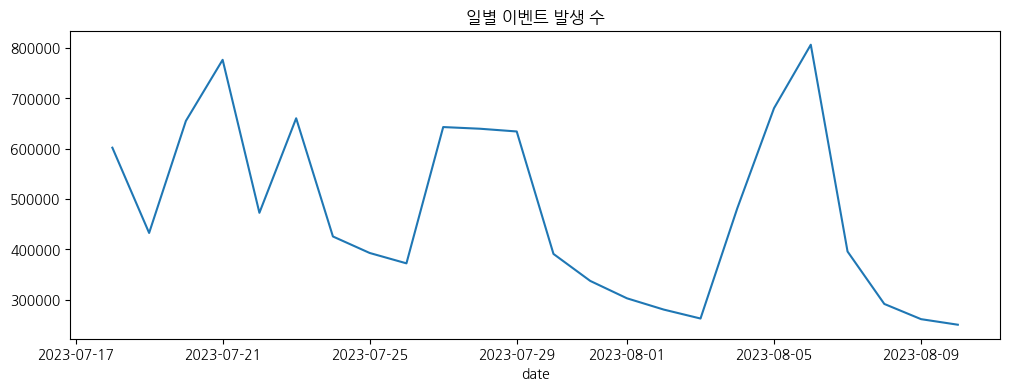

In [8]:
hackle_events_df['event_datetime'] = pd.to_datetime(hackle_events_df['event_datetime'])
hackle_events_df['date'] = hackle_events_df['event_datetime'].dt.date

hackle_events_df['date'].value_counts().sort_index().plot(figsize=(12, 4), title='일별 이벤트 발생 수')

#### 페이지별 이벤트 발생량

<Axes: title={'center': '페이지별 이벤트 수'}, ylabel='page_name'>

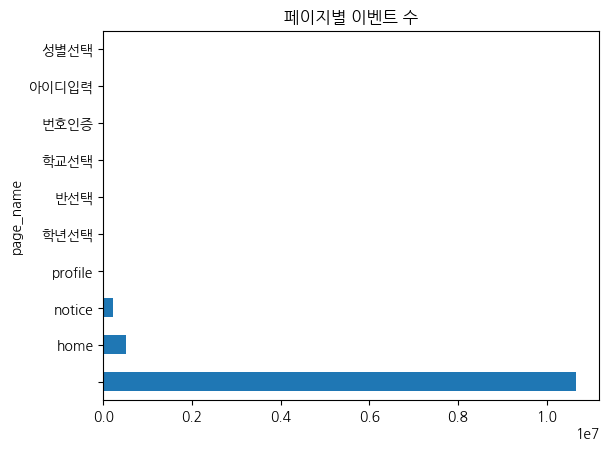

In [9]:
hackle_events_df['page_name'].value_counts().head(10).plot(kind='barh', title='페이지별 이벤트 수')

#### heart_balance / votes_count / friend_count 분포

array([[<Axes: title={'center': 'friend_count'}>,
        <Axes: title={'center': 'votes_count'}>],
       [<Axes: title={'center': 'heart_balance'}>, <Axes: >]],
      dtype=object)

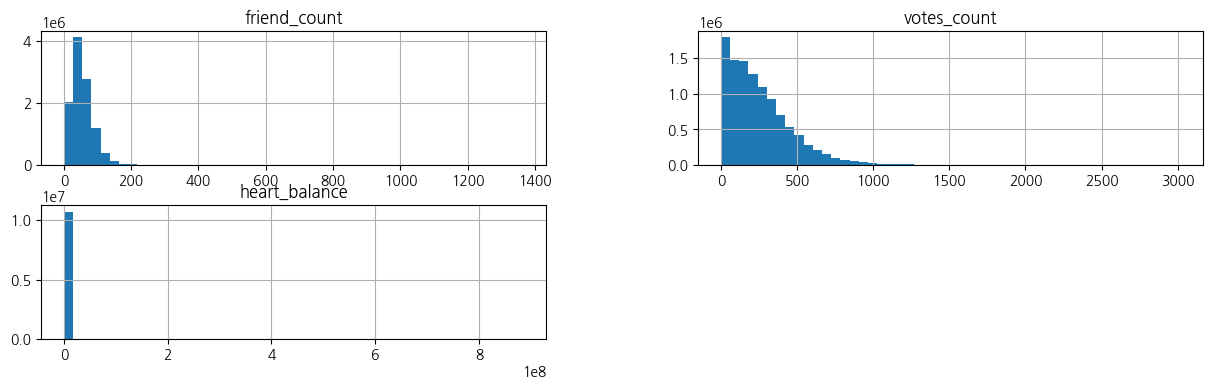

In [10]:
cols = ['friend_count', 'votes_count', 'heart_balance']
hackle_events_df[cols].hist(bins=50, figsize=(15, 4))

#### 질문(question_id) 기준으로 많이 조회된 질문 Top N

In [12]:

hackle_events_df['question_id'].value_counts().dropna().head(10)

question_id
1629.0    403
5051.0    342
4435.0    338
5127.0    334
5039.0    329
5007.0    327
2518.0    317
4240.0    316
4884.0    311
4583.0    310
Name: count, dtype: int64

---

# 2. hackle_properties

In [ ]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"
# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/hackle/hackle_properties.parquet'

# 데이터 불러오기
hackle_properties_df = pd.read_parquet(gcs_path, engine='pyarrow')
hackle_properties_df

---

# 3. device_properties

In [ ]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"
# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/hackle/device_properties.parquet'

# 데이터 불러오기
device_properties_df = pd.read_parquet(gcs_path, engine='pyarrow')
device_properties_df

---

# 4. user_properties

In [ ]:
# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"
# GCS의 Parquet 파일 경로
gcs_path = 'https://storage.cloud.google.com/final_project_enuyu/data/final_project/hackle/user_properties.parquet'

# 데이터 불러오기
user_properties_df = pd.read_parquet(gcs_path, engine='pyarrow')
user_properties_df